##  Import Libraries

In [1]:
# for data manipulation & wrangling
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# for train test spliting 
from sklearn.model_selection import train_test_split

# for feature scaling
from sklearn.preprocessing import StandardScaler

# algorithms for classification task 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


# Evaluation metrics for model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# to supress any warning message in notebook
import warnings
warnings.filterwarnings("ignore")

##  Import Dataset

In [2]:
# load & read the data 
data = pd.read_csv("diabetes.csv")

# glimpse of top 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Dimension**

In [3]:
# check number of  rows & columns 
print("Rows :", data.shape[0])
print("Columns :", data.shape[1])

Rows : 768
Columns : 9


In [4]:
# check all the variable names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# target & features

TARGET = 'Outcome'

features = [col for col in data.columns if col != TARGET]

print("{} is our target variable".format(TARGET))
print()
print("Independent varaiables are : ")
print(features)

Outcome is our target variable

Independent varaiables are : 
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## Exploratory Data Analysis

**Missing Values**

In [6]:
# check missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Duplicate Values**

In [7]:
# check for any duplicate rows
data.duplicated().sum()

0

**Data Types**

In [8]:
# check datatypes
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Univariate Analysis

**Target Distribution**

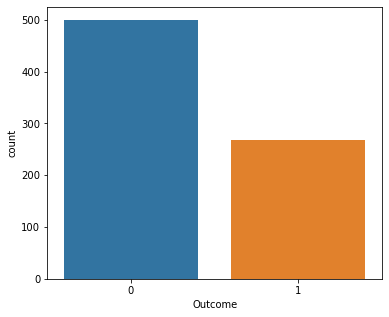

Total number of datapoints are 768.
0    500
1    268
Name: Outcome, dtype: int64


0 means ---> Patient with NO diabetes
1 means ----> Patient with diabetes


In [9]:
# visualizing target distribution
plt.figure(figsize = (6,5))
sns.countplot(data['Outcome'])
plt.show()

print("Total number of datapoints are {}.".format(len(data)))
print(data['Outcome'].value_counts())
print("\n")
print("0 means ---> Patient with NO diabetes")
print("1 means ----> Patient with diabetes")

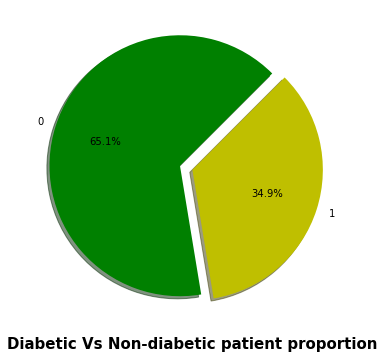

0    65.1
1    34.9
Name: Outcome, dtype: float64


In [10]:
# pie chart to showcase proprtion of categories in target -Outcome
colors = ['g', 'y']
explode = (0.1, 0)

# pie chart
data['Outcome'].value_counts().plot(kind ='pie',
                                      shadow = True,
                                      startangle = 45,
                                      label = "",
                                      colors = colors,
                                      explode = explode,
                                      figsize=(10,6),
                                      autopct='%1.1f%%')

# giving name to the graph
plt.xlabel("Diabetic Vs Non-diabetic patient proportion", fontsize = 15, weight = 'bold')

# show graph
plt.show()

# printing proprtion of class 
print(round(data['Outcome'].value_counts(normalize = True)*100, 2))

#### Observation
+ There is a **class imbalance** in our target variable.
+ **34.9%** of patients **have diabetes** while **65.1%** of patients **don't have diabetes**.

In [11]:
# descriptive summary stats
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observations:
+ Many variables like **Glucose,BloodPressure,SkinThickness,Insulin , BMI** have minimum value of 0 which is not possible.
+ We need to replace or impute those values with proper meaningful values like mean or median.
+ Magnitude of all the variables are different, so we need to scale the them before feeding into model.

**Histogram**

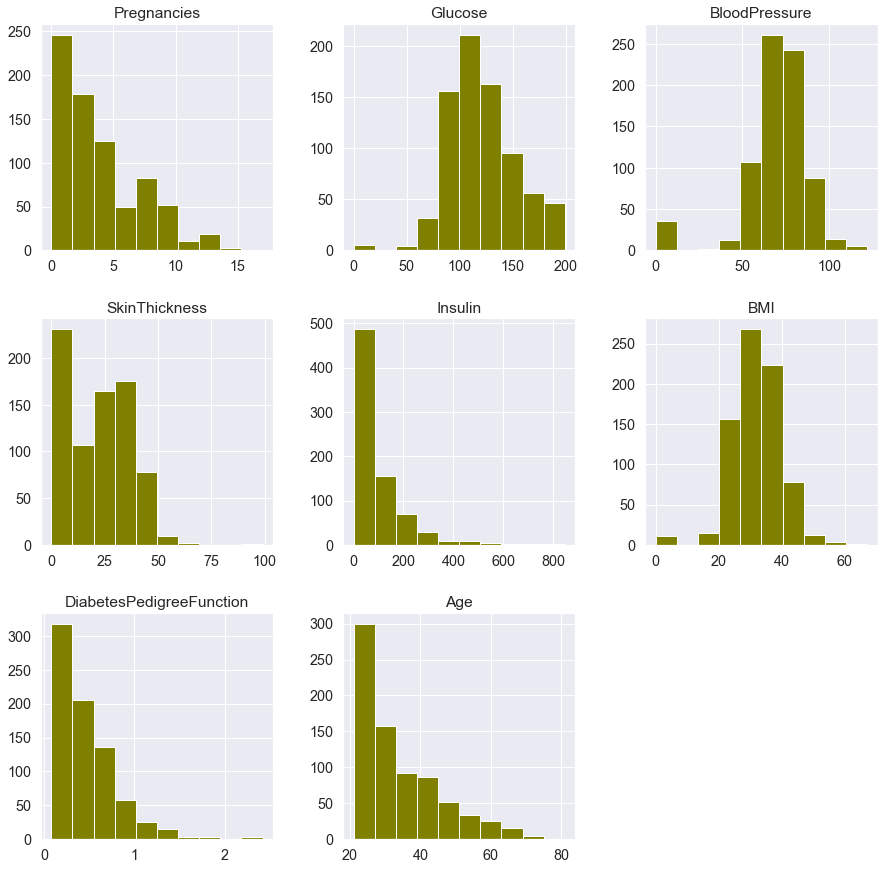

In [12]:
sns.set(font_scale=1.3)
data[features].hist(figsize = (15,15), color = 'olive')
plt.show()

**Outlier Detection**

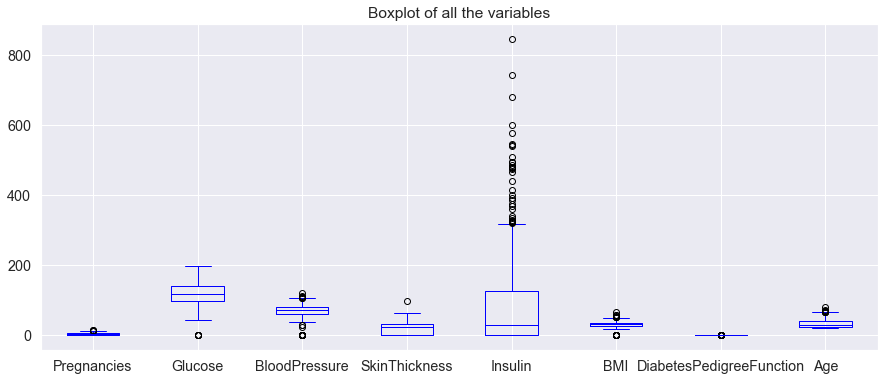

In [13]:
sns.set(font_scale = 1.3)
data[features].plot(kind='box', title='Boxplot of all the variables', figsize = (15,6), color = 'blue')
plt.show()

#### Observations:
+ Almost all variables contains outliers.

### Bivariate Analysis

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Outcome & Pregnancies**

<Figure size 432x360 with 0 Axes>

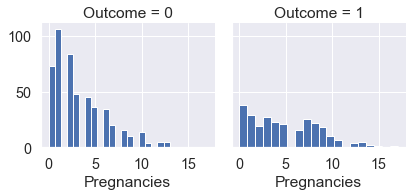

In [15]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'Pregnancies', bins=20)
plt.show()

In [16]:
data.groupby('Outcome')['Pregnancies'].mean()

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64

**Outcome & Glucose**

<Figure size 432x360 with 0 Axes>

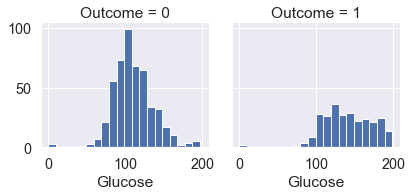

In [17]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'Glucose', bins=20)
plt.show()

In [18]:
data.groupby('Outcome')['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

**Outcome & BloodPressure**

<Figure size 432x360 with 0 Axes>

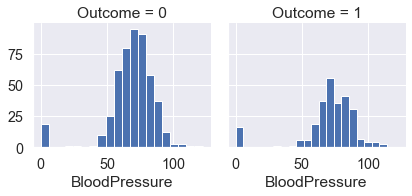

In [19]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'BloodPressure', bins=20)
plt.show()

In [20]:
data.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

**Outcome & SkinThickness**

<Figure size 432x360 with 0 Axes>

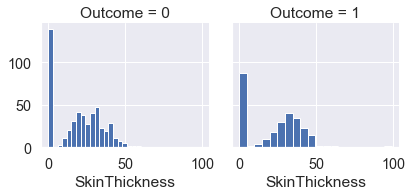

In [21]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'SkinThickness', bins=20)
plt.show()

In [22]:
data.groupby('Outcome')['SkinThickness'].mean()

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64

**Outcome & Insulin**

<Figure size 432x360 with 0 Axes>

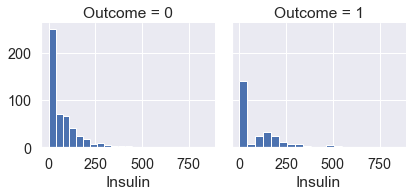

In [23]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'Insulin', bins=20)
plt.show()

In [24]:
data.groupby('Outcome')['Insulin'].mean()

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

**Outcome & BMI**

<Figure size 432x360 with 0 Axes>

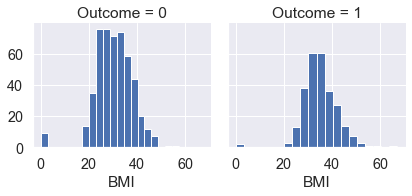

In [25]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'BMI', bins=20)
plt.show()

In [26]:
data.groupby('Outcome')['BMI'].mean()

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

**Outcome & DiabetesPedigreeFunction**

<Figure size 432x360 with 0 Axes>

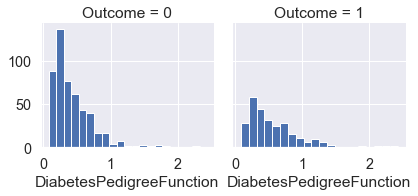

In [27]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'DiabetesPedigreeFunction', bins=20)
plt.show()

In [28]:
data.groupby('Outcome')['DiabetesPedigreeFunction'].mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

**Outcome & Age**

<Figure size 432x360 with 0 Axes>

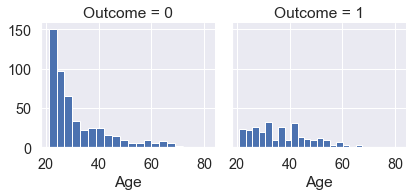

In [29]:
plt.figure(figsize = (6,5))
g = sns.FacetGrid(data, col ='Outcome')
g.map(plt.hist, 'Age', bins=20)
plt.show()

In [30]:
data.groupby('Outcome')['Age'].mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

### Multivariate Analysis

**Correlation**

In [31]:
# correlation among independent variables
corr_matrix = data[features].corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


**Heatmap**

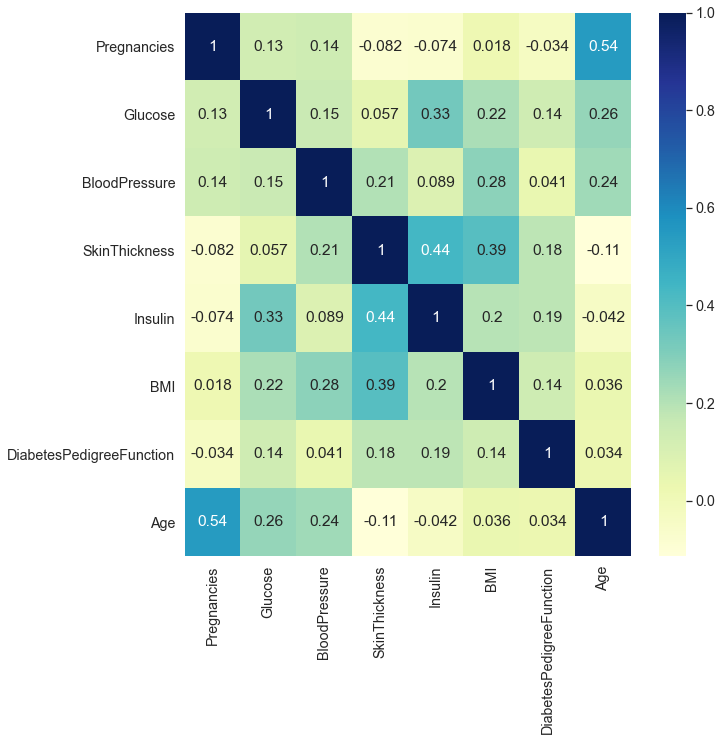

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show()

In [33]:
# correlation between target & independent variables
data.corr()['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

#### Observations:
+ There are no strong correlation among all the variables.
+ Only **Age & Pregnancies** have moderate correlation **(0.54)** with each other.
+ Among all variables only **Glucose** is showing moderate positive correlation with Target variable.

## Data Pre-processing

**Replacing 0 with mean**

In [34]:
# imputing all the zero values with mean of the respective variables
for col in ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.NaN)
    col_mean = int(data[col].mean(skipna = True))
    data[col] = data[col].replace(np.NaN, col_mean)

In [35]:
# check the data after imputation
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,155.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,155.0,35.3,0.134,29,0


In [36]:
# all the minimum value of 0 has gone after replacing zeros with mean
data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.00000,768.000000
mean,121.682292,72.386719,29.108073,155.28125,32.450911
std,30.435999,12.096642,8.791221,85.02155,6.875366
min,44.000000,24.000000,7.000000,14.00000,18.200000
25%,99.750000,64.000000,25.000000,121.50000,27.500000
50%,117.000000,72.000000,29.000000,155.00000,32.000000
75%,140.250000,80.000000,32.000000,155.00000,36.600000
max,199.000000,122.000000,99.000000,846.00000,67.100000


## Segregating Variables : Independent & Dependent Variables

In [37]:
# spliting data into input variables & target
X = data.drop(['Outcome'], axis = 1)
Y =  data['Outcome']

## Scaling the Data (Using Standard Scaler)

In [38]:
# scaling the data
ss = StandardScaler()
x_scaled = ss.fit_transform(X)

In [39]:
X = pd.DataFrame(x_scaled, columns = X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865254,-0.031990,0.670643,-0.003310,0.167240,0.468492,1.425995
1,-0.844885,-1.206013,-0.528319,-0.012301,-0.003310,-0.851551,-0.365061,-0.190672
2,1.233880,2.015957,-0.693761,-0.012301,-0.003310,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074504,-0.528319,-0.695245,-0.721243,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503604,-2.679076,0.670643,0.149692,1.549885,5.484909,-0.020496


## Train Test Split

In [40]:
# spliting the data into train & test (80: 20 ratio)

random_state = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state = random_state)

In [41]:
# print shape of training data - 80%
print(X_train.shape, Y_train.shape)

(614, 8) (614,)


In [42]:
# print shape of validation data - 20%
print(X_test.shape, Y_test.shape)

(154, 8) (154,)


##  Model Building

### K NeighborsClassifier

In [43]:
# creating instance of KNN using default n_neighbors = 5
classifier= KNeighborsClassifier()  
classifier.fit(X_train, Y_train) 

KNeighborsClassifier()

In [44]:
#Predicting the test set result  
y_pred = classifier.predict(X_test)  
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Model Evaluation

**Confusion Matrix**

In [45]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cf_matrix = confusion_matrix(Y_test, y_pred)
cf_matrix

array([[88, 19],
       [18, 29]], dtype=int64)

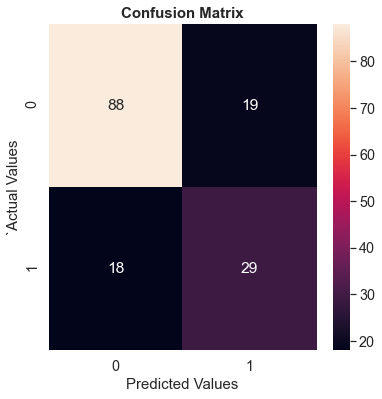

In [46]:
# visualising confusion matrix using heatmap
plt.figure(figsize = (6,6))
sns.heatmap(cf_matrix, annot = True, fmt = 'g')
plt.title("Confusion Matrix", fontsize = 15, weight = 'bold')
plt.xlabel("Predicted Values", fontsize = 15)
plt.ylabel("`Actual Values", fontsize = 15)
plt.show()

**Accuracy**

In [47]:
# calculating accuracy 
acc_score = accuracy_score(Y_test, y_pred)
acc_score

0.7597402597402597

**Classification report**

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.60      0.62      0.61        47

    accuracy                           0.76       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



## Finding Best K-value for the Model

In [49]:
# creating empty list to store accuracy scores

train_accuracy= []
test_accuracy = []


# looping through k value from 3 to 30 with difference of 2
for k in range(3, 30, 2):
    
    # using KNN model taking different values of K
    model = KNeighborsClassifier(n_neighbors = k,  p = 1, metric = 'minkowski')
    
    # fitting the data
    model.fit(X_train, Y_train)
    
    # training predictions
    train_pred = model.predict(X_train)
    
    # validation predictions
    test_pred = model.predict(X_test)
    
    # calculating accuracy on training data
    train_score = accuracy_score(train_pred, Y_train)
    
    # calculating accuracy on validation data
    test_score = accuracy_score(test_pred, Y_test)
    
    # storing training accuracy scores
    train_accuracy.append(train_score)
    
    # storing validation accuracy scores
    test_accuracy.append(test_score)

In [50]:
# only k = 82.46
# weights = 'distance', p = 1, metric = 'euclidean' = 82.46
# weights = 'distance', p = 2, metric = 'euclidean' = 82.46
# weights = 'uniform', p = 1, metric = 'euclidean' = 82.46
# weights = 'uniform', p = 2, metric = 'euclidean' = 82.46

# weights = 'uniform', p = 1, metric = 'minkowski' = 83.76--best
# weights = 'uniform', p = 2, metric = 'minkowski' = 82.46
# weights = 'distance', p = 1, metric = 'minkowski' = 83.11
# weights = 'distance', p = 2, metric = 'minkowski' = 82.46

# weights = 'uniform', p = 1, metric = 'manhattan' = 83.76-- best
# weights = 'uniform', p = 2, metric = 'manhattan' = 83.76
# weights = 'distance', p = 1, metric = 'manhattan' = 83.11
# weights = 'distance', p = 2, metric = 'manhattan' = 83.11

In [51]:
# creating a dataframe with max depth values & model accuracies
k_frame = pd.DataFrame({'k_value': range(3,30,2),
                        'train_acc': train_accuracy,
                        'test_acc': test_accuracy 
})

# sorting based on test accuracies
k_frame.sort_values(by = ['test_acc'], ascending = False)

,k_value,train_acc,test_acc
5,13,0.807818,0.837662
6,15,0.785016,0.824675
10,23,0.770358,0.824675
12,27,0.767101,0.818182
4,11,0.814332,0.811688
7,17,0.775244,0.811688
8,19,0.770358,0.811688
9,21,0.783388,0.811688
11,25,0.767101,0.811688
13,29,0.770358,0.805195


#### Observations:
+ We are getting best test accuracy of **83.76%** using **K value = 13**.

**Plotting K values and Accuracy Scores**

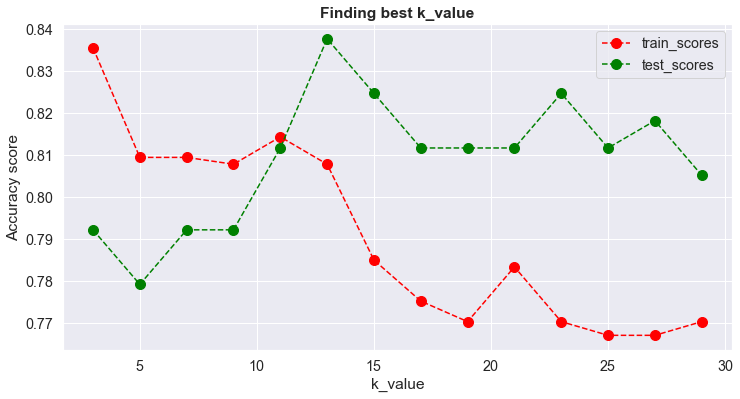

In [52]:
# plotting accuracy and max depth values
plt.figure(figsize=(12, 6))

plt.plot(k_frame['k_value'], k_frame['train_acc'], marker='o', linestyle ='dashed', markersize=10, color='red',label = 'train_scores')
plt.plot(k_frame['k_value'], k_frame['test_acc'], marker='o', linestyle ='dashed', markersize=10, color='green', label = 'test_scores')
plt.title('Finding best k_value', weight = 'bold')
plt.xlabel('k_value')
plt.ylabel('Accuracy score')
plt.legend()

### KNN Model with Best K value

In [53]:
# creating instance of KNN using best value of k ( n_neighbors = 13)
best_knn = KNeighborsClassifier(n_neighbors = 13,  p = 1, metric = 'minkowski')  
best_knn.fit(X_train, Y_train)

# training predictions
train_pred = best_knn.predict(X_train)
knn_train_score = round(accuracy_score(train_pred, Y_train) * 100, 2)
print("Training score on KNN  model is {}% : ".format(knn_train_score))

# validation predications
test_pred = best_knn.predict(X_test)
knn_test_score = round(accuracy_score(test_pred, Y_test) * 100, 2)
print("Test score on KNN model is {}% : ".format(knn_test_score))

Training score on KNN  model is 80.78% : 
Test score on KNN model is 83.77% : 


**Confusion Matrix**

In [54]:
cf_matrix = confusion_matrix(Y_test, y_pred)
cf_matrix

array([[88, 19],
       [18, 29]], dtype=int64)

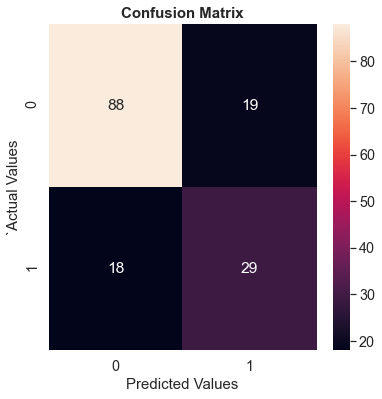

In [55]:
# visualising confusion matrix using heatmap
plt.figure(figsize = (6,6))
sns.heatmap(cf_matrix, annot = True, fmt = 'g')
plt.title("Confusion Matrix", fontsize = 15, weight = 'bold')
plt.xlabel("Predicted Values", fontsize = 15)
plt.ylabel("`Actual Values", fontsize = 15)
plt.show()

### Logistic Regression

In [56]:
# initialize the model & fit on training data
logreg = LogisticRegression(random_state = random_state)
logreg.fit(X_train, Y_train)

# training predictions
train_pred = logreg.predict(X_train)
log_train_score = round(accuracy_score(train_pred, Y_train) * 100, 2)
print("Training score on Logistic Regression  model is {}% : ".format(log_train_score))

# validation predications
test_pred = logreg.predict(X_test)
log_test_score = round(accuracy_score(test_pred, Y_test) * 100, 2)
print("Test score on Logistic Regression model is {}% : ".format(log_test_score))

Training score on Logistic Regression  model is 76.71% : 
Test score on Logistic Regression model is 81.17% : 


### Gaussian Naive Bayes

In [57]:
# initialize the model & fit on training data
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

# training predictions
train_pred = gaussian.predict(X_train)
gnb_train_score = round(accuracy_score(train_pred, Y_train) * 100, 2)
print("Training score on Gaussian naive bayes model is {}% ".format(gnb_train_score))


# validation predications
test_pred = gaussian.predict(X_test)
gnb_test_score = round(accuracy_score(test_pred, Y_test) * 100, 2)
print("Test score on Gaussian naive bayes model is {}% ".format(gnb_test_score))

Training score on Gaussian naive bayes model is 74.92% 
Test score on Gaussian naive bayes model is 78.57% 


### Decision Tree Classifier

In [58]:
# initialize the model & fit on training data
decision_tree = DecisionTreeClassifier(random_state = random_state)
decision_tree.fit(X_train, Y_train)

# training predictions
train_pred = decision_tree.predict(X_train)
dt_train_score = round(accuracy_score(train_pred, Y_train) * 100, 2)
print("Training score on DecisionTreeClassifier model is {}% ".format(dt_train_score))

# validation predications
test_pred = decision_tree.predict(X_test)
dt_test_score = round(accuracy_score(test_pred, Y_test) * 100, 2)
print("Test score on DecisionTreeClassifier model is {}% ".format(dt_test_score))

Training score on DecisionTreeClassifier model is 100.0% 
Test score on DecisionTreeClassifier model is 70.13% 


### Random Forest Classifier

In [59]:
# initialize the model & fit on training data
random_forest = RandomForestClassifier(n_estimators = 200, random_state = random_state )
random_forest.fit(X_train, Y_train)

# training predictions
train_pred = random_forest.predict(X_train)
rf_train_score = round(accuracy_score(train_pred, Y_train) * 100, 2)
print("Training score on RandomForestClassifier model is {}% ".format(rf_train_score))

# validation predications
test_pred = random_forest.predict(X_test)
rf_test_score = round(accuracy_score(test_pred, Y_test) * 100, 2)
print("Test score on RandomForestClassifier model is {}% ".format(rf_test_score))

Training score on RandomForestClassifier model is 100.0% 
Test score on RandomForestClassifier model is 81.82% 


## Comparing Model Performances

In [60]:
models = pd.DataFrame({
    'Model': ['KNN',
              'Logistic Regression',
              'Decision Tree',
              'Random Forest',
              'Guassian Naive Bayes'],
    
    'Score': [knn_test_score,
              log_test_score, 
              dt_test_score,
              rf_test_score,
              gnb_test_score ]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,83.77
3,Random Forest,81.82
1,Logistic Regression,81.17
4,Guassian Naive Bayes,78.57
2,Decision Tree,70.13


#### Observations:
+ **KNN model** giving best result with an accuracy score of **83.77%**